# 1、什么是多项式回归

多项式回归与模型泛化，Polynomial Regression and Model Generalization。

首先生成我们要拟合的数据。

+ 只有一个特征，但是自变量和因变量呈现不是线性关系，而是二次的关系： $ y = 0.5 x^2 + x + 2$
+ 噪音是一个均值为零，方差不大的正态分布（高斯分布）

+ 自变量与因变量呈现的函数关系，看起来不是直线关系。看起来像是一条二次曲线。本身，我们的模拟数据的创建，就是一条二次曲线加上了均值为 0 ，方程为 1 的正态分布的噪音生成的。

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)  # 一个特征

y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

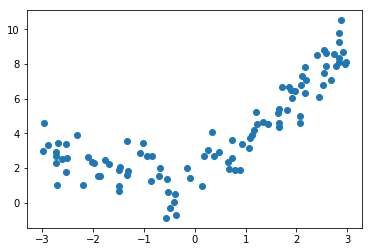

In [3]:
plt.scatter(x, y)
plt.show()

接下来，我们试着用线性回归来拟合这些数据。

线性回归？

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


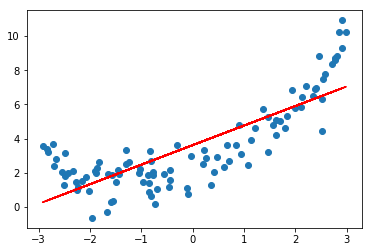

In [7]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

发现拟合的效果不是很好。

## 接下来我们试着增加一个特征

增加这个特征的方式，是将原有的 1 个特征的值，平方以后，记为第 2 个特征。

In [8]:
X2 = np.hstack([X, X**2])

In [9]:
X2.shape

(100, 2)

In [14]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

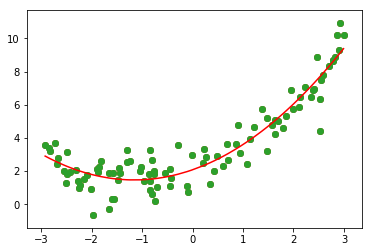

In [15]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [16]:
lin_reg2.coef_

array([ 1.06204061,  0.4601299 ])

In [17]:
lin_reg.intercept_

3.6093786005241446

# 总结

+ 通过以上的分析，我们可以看到，通过特征的组合，可以增强模型的表达能力；
+ 特征的组合仅仅只是把相同的，或者不同的特征两两进行组合，数学上的泰勒公式，保证了这种特征组合的有效性；
+ 但是要特别注意的是，增强模型的表达能力增强了，带来的坏处就是增加了过拟合风险，也就是说，模型把噪声学进来了，这是我们不希望看到的。